# Tamaño óptimo de grupos en *Pool Testing*
*Patricio Poblete*

Supongamos que tenemos $M$ máquinas, donde cada una es capaz de procesar una muestra por unidad de tiempo. Si hay una demanda ilimitada de muestras para ser procesadas, el *throughput* de este sistema es $M$ muestras por unidad de tiempo.

Una idea para aumentar este *throughput* es formar grupos de $g$ muestras, y utilizar cada máquina para procesar la mezcla de esas $g$ muestras. Si el resultado es negativo, todas las muestras de ese grupo son negativas. Si el resultado es positivo, entonces cada una de esas muestras pasa a ser analizada individualmente. La siguiente figura muestra ambos esquemas de procesamiento.

![setup](setup.png)

Para que este segundo procesamiento se pueda realizar, apartamos $k$ máquinas, y por lo tanto solo $M-k$ máquina están disponibles para procesar las mezclas. Si la probabilidad de que una muestra individual sea positiva es $p$, entonces la probabilidad de que un grupo sea negativo es $(1-p)^g$. Por lo tanto, el número de nuestras que necesitan ser retesteadas individualmente es $(M-k)g(1-(1-p)^g)$. Pero esto debe coincidir con el número de máquinas $k$ disponibles para este efecto. Por lo tanto,

$$
k=(M-k)g(1-(1-p)^g)
$$

lo cual implica que

$$
k=\frac{g(1-(1-p)^g)}{1+g(1-(1-p)^g)}
$$

y por lo tanto el throughput es $(M-k)g$, lo que, sustituyendo el valor de $k$, resulta ser igual a:

$$
M \frac{g}{1+g-g(1-p)^g}
$$

Si definimos $\mu(p,g)=\frac{g}{1+g-g(1-p)^g}$, éste es el factor de mejora del *throughput* que se obtiene con este esquema. A continuación estudiaremos el valor óptimo de $g$ para maximizar este factor.

Veamos cómo varía $\mu(p,g)$ para un par de valores de $p$:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


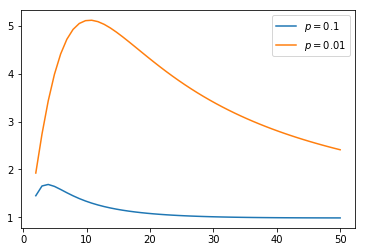

In [2]:
def mu(p,g):
    return g/(1+g-g*(1-p)**g)
g=linspace(2,50)
plt.plot(g,mu(0.1,g),label='$p=0.1$')
plt.plot(g,mu(0.01,g),label='$p=0.01$')
leg=plt.legend(loc='best')

Para calcular el valor óptimo de $g$, calculamos la derivada de $\mu$ respecto de $g$ e igualamos a cero. Esto da la ecuación

$$
(1-p)^g g^2 \ln{(1-p)}+1=0
$$

cuya solución es

$$
g^* = \frac{2W \left(-\frac{\sqrt{-\ln{(1-p)}}}{2}\right)}{\ln{(1-p)}}
$$

donde $W(x)$ es la función $W$ de Lambert, que satisface $W(x)e^{W(x)}=x$.

La siguiente figura muestra cómo varía $g^*$ en función de $p$:

In [3]:
import mpmath as mp
mp.dps=25
mp.pretty=True

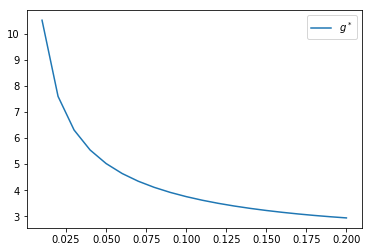

In [4]:
def gopt(p):
    return 2*mp.lambertw(-sqrt(-log(1-p))/2)/log(1-p)
p=linspace(0.01,0.2,20)
q=[gopt(x) for x in p]
plt.plot(p,q,label='$g^*$')
leg=plt.legend(loc='best')

La siguiente figura muestra cómo varía $\mu(p,g^*)$ en función de $p$:

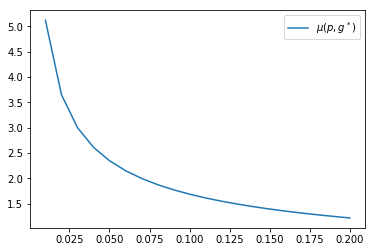

In [5]:
def muopt(p):
    return mu(p,gopt(p))
p=linspace(0.01,0.2,20)
q=[muopt(x) for x in p]
plt.plot(p,q,label='$\mu(p,g^*)$')
leg=plt.legend(loc='best')